# データの準備
sklearn はモデルだけでなく
* データ
* 前処理

も備わっている

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
# がく片の長さ、花びらの長さを特徴量として扱う
X = iris.data[:, [2, 3]]
y = iris.target

# Iris-Setosa: 0, Iris-Versicolor: 1, Iris-Virginica: 2
print('Class labels: ', np.unique(y))

Class labels:  [0 1 2]


In [0]:
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler

# 標準化によるスケーリング
sc = StandardScaler()
# 訓練データの情報をもとに、平均と標準偏差を推定
sc.fit(X_train)
# 訓練データ、テストデータの特徴量を標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# パーセプトロン
Chap2と同様のモデルを簡単に使える

In [4]:
from sklearn.linear_model import Perceptron

# n_iter -> max_iter
# eta -> eta0
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
y_pred = ppn.predict(X_test_std)
print(f'Misclassified samples: {(y_test != y_pred).sum()}')

Misclassified samples: 5


教科書の結果と異なるのは、 sklearn のバージョン0.20から Iris dataset のエラー5件が修正されているため。 [[link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)]

In [6]:
from sklearn.metrics import accuracy_score

# 上記の計算を勝手にしてくれる（「誤分類」 ではなく 「正しく分類できた割合」）
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8888888888888888


In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # マーカーとカラーマップの準備
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 決定境界の領域をプロット
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # グリッドポイントの生成
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))

  # 特徴量を1次元配列に変換して予測
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  
  # 等高線のプロット
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  # 軸の範囲の設定
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # クラスごとにプロット
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                alpha=0.6, c=cmap(idx),
                marker=markers[idx], label=cl)
    
  # テストサンプルを目立たせる
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                alpha=1.0, edgecolor='black', linewidths=1, marker='o',
                s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color seq

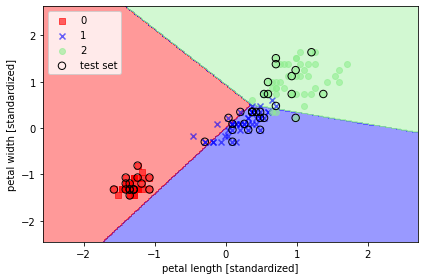

In [8]:
# 訓練データとテストデータを結合してプロット
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# test_idx を指定することで、テストデータを目立たせる（黒丸）
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# ロジスティック回帰
「回帰」だが、「分類」モデル

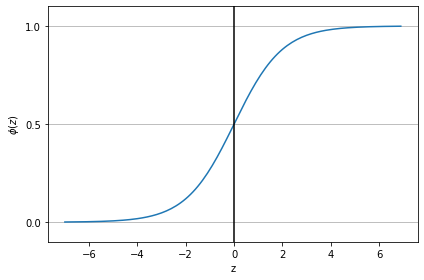

In [9]:
# シグモイド関数を定義
# ロジスティック回帰では、このシグモイド関数を活性化関数 activate(X)　として扱う 
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

# -7 から　7　まで、0.1　刻み
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
# x=0 に垂直線を追加
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
# $$ で囲むと TeX っぽく数式を書けるらしい
plt.ylabel('$\phi (z)$')

# y軸の目盛りを追加
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
# y軸の目盛りに合わせて水平線を追加
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color seq

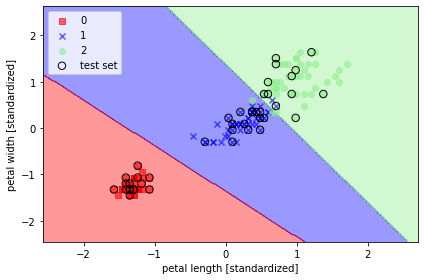

In [10]:
from sklearn.linear_model import LogisticRegression

# C: float(possitive), 正則化(過学習を防ぐため、各重みの2乗和を損失関数に入れる)の強さの逆数。
# 値が小さいほど強く正則化を行う。
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

# 決定境界をプロット
plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
# 上から１番目のテストデータについて、それぞれのクラスに所属する確率
lr.predict_proba(X_test_std[0, :].reshape(1, -1))

array([[6.51335792e-16, 4.95077314e-04, 9.99504923e-01]])

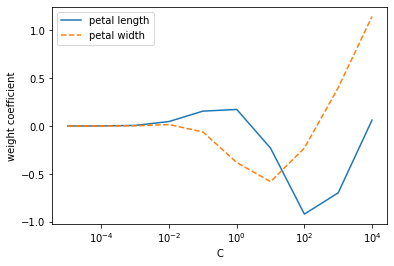

In [12]:
# ロジスティック回帰の正則化に関するパラメータ C を変化させて、重み係数との関係を見る
weights, params = [], []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# サポートベクトルマシン
AかBのどちらに属するか、のギリギリに位置するデータを扱う

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color seq

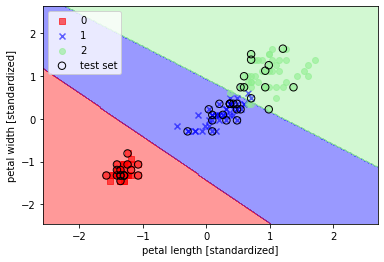

In [13]:
from sklearn.svm import SVC

# C: 正則化の強さの逆数。
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

# 決定境界をプロット
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [0]:
# メモリにおさめるため、SGD で重み更新を行う代替モデルを使うこともできる
from sklearn.linear_model import SGDClassifier

# パーセプトロン
ppn = SGDClassifier(loss='perceptron')
# ロジスティック回帰
lr = SGDClassifier(loss='log')
# SVM
svm = SGDClassifier(loss='hinge')

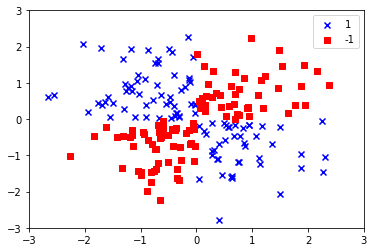

In [15]:
# SVM　は非線形も分類できる
# XOR データセットを作成
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
            c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
            c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


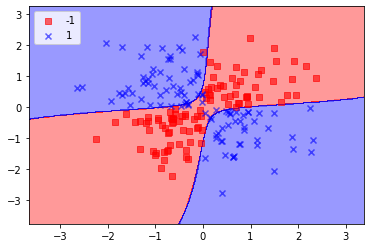

In [16]:
# RBF カーネルによる SVM
# gamma: カットオフパラメータ。
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

# 境界領域をプロット
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color seq

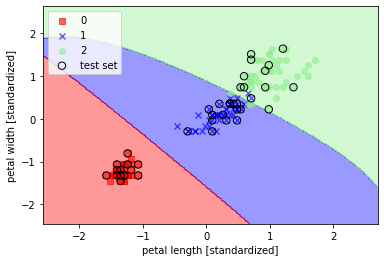

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color seq

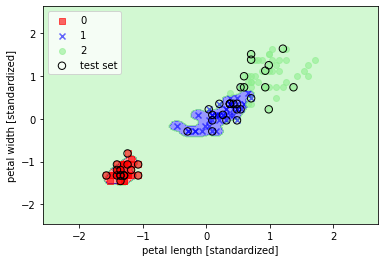

In [17]:
# SVM のカットオフパラメータ(gamma)の影響
# gamma が小さい時
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
# 決定領域をプロット
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# gamma が大きい時
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
# 決定領域をプロット
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# 決定木
Yes No の分岐で説明可能な分類ができる  
分割条件は
* ジニ不純度
* エントロピー
* 分類誤差

In [0]:
# ジニ不純度
def gini(p):
  return (p) * (1 - (p)) + (1 - (p)) * (1 - (1 - p))

# エントロピー
def entropy(p):
  return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

# 分類誤差
def error(p):
  return 1 - np.max([p, 1 - p])

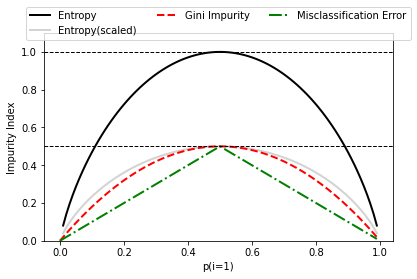

In [19]:
# 確率を表す配列を生成（0から0.99まで0.01刻み）
x = np.arange(0.0, 1.0, 0.01)

# エントロピー、スケールされたエントロピー、分類誤差を計算
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy(scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
  line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)
# 2本水平破線を引く
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color seq

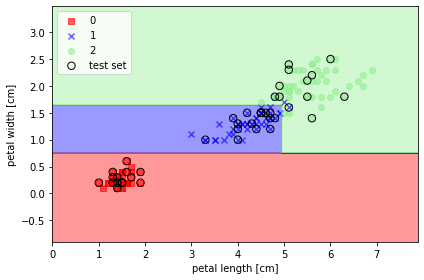

In [20]:
# 標準化してない特徴量で、深さ3の決定木を学習
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,
                      classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [0]:
# 決定木を図で表す
from sklearn.tree import export_graphviz

export_graphviz(tree,
                out_file='tree.dot',
                feature_names=['petal length', 'petal width'])

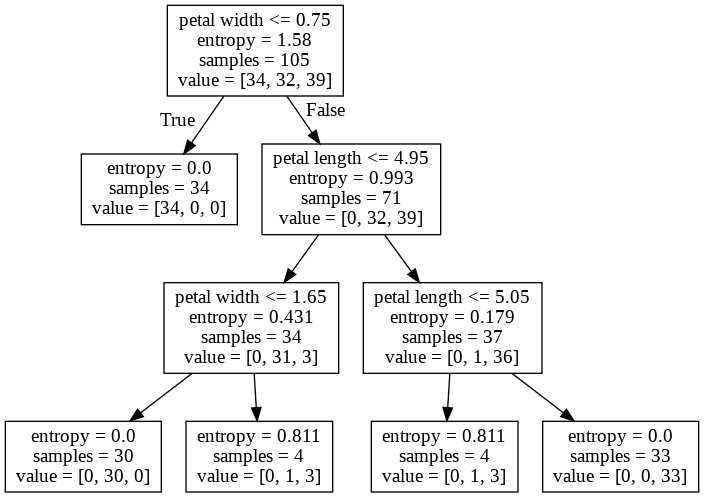

In [22]:
# 画像を表示
from IPython.display import Image, display_png
!dot -Tpng tree.dot -o tree.png
display_png(Image("tree.png"))

In [0]:
from IPython.display import Image
from IPython.display import display

dot_data = export_graphviz(tree,
                           out_file='tree2.dot',
                           feature_names=['petal length', 'petal width'],
                           class_names=['setosa', 'versicolor', 'virginica'],
                           filled=True,
                           rounded=True)

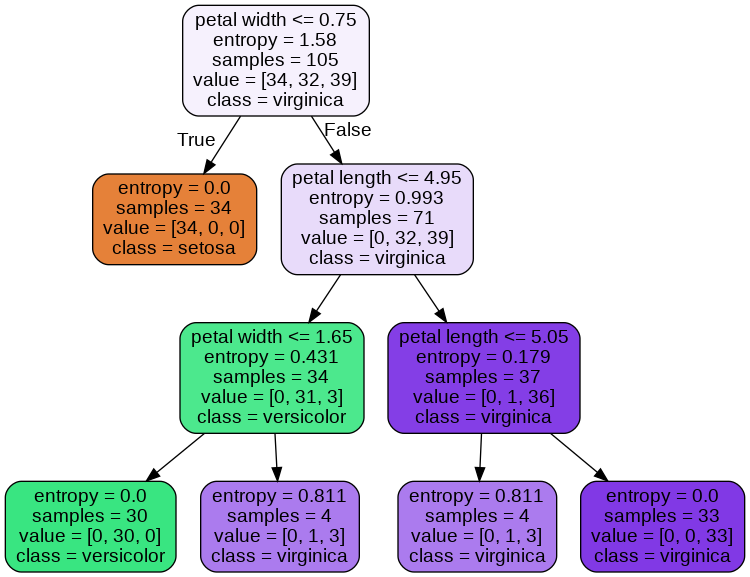

In [24]:
# 画像を表示
!dot -Tpng tree2.dot -o tree2.png
display_png(Image("tree2.png"))

## ランダムフォレスト
複数の決定木を用いて多数決

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color seq

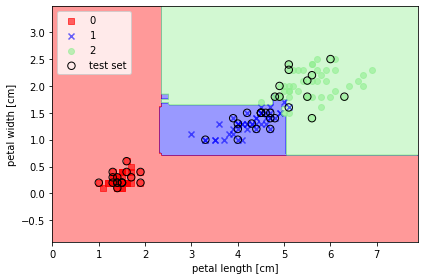

In [27]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators: 予測を行う決定木の数
# n_jobs: 計算を行うコンピュータのコア数。2以上の時、並列化を行う
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=50, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

# 決定境界をプロット
plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# k近傍法
周辺k個のデータで多数決

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color seq

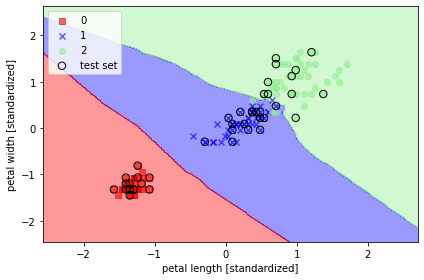

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors: 多数決を行う周辺データ数
# p: 1=マンハッタン距離、2=ユークリッド距離
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

# 決定境界をプロット
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()